# Computergestützte Mathematik zur Analysis

24.01.2019

&copy; Rüdiger W. Braun

In [1]:
from sympy import *
init_printing()
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

Differentialgleichungen

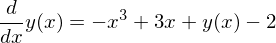

In [2]:
x = Symbol('x')
y = Function('y')
dgl = Eq(y(x).diff(x), y(x)-x**3+3*x-2)
dgl

In [3]:
lsg = dsolve(dgl).expand()
lsg

In [4]:
print(lsg)

Eq(y(x), C1*exp(x) + x**3 + 3*x**2 + 3*x + 5)


In [5]:
#lsg.subs(C1, 3) # NameError

In [6]:
C1 = Symbol('C1')
lsg.subs(C1, 3)

Wir wollen die Anfangsbedingung $y(0)=4$ erfüllen.

In [7]:
phi = lsg.rhs
ab = Eq(phi.subs(x,0), 4)
ab

In [8]:
lsg_ab = solve(ab, C1)
lsg_ab

In [9]:
phi_ab = phi.subs(C1, lsg_ab[0])
phi_ab

Lösungskurven für verschiedene Anfangswerte

In [10]:
plt.figure()
xn = np.linspace(-1.5,2)
for y0 in [S(1)/2, 1, S(3)/2]:
    ab = Eq(phi.subs(x, 0), y0)
    Lsg_AWA = solve(ab)
    fn = lambdify(x, phi.subs(C1, Lsg_AWA[0]), 'numpy')
    label = f'$ {latex(y0)} $'
    plt.plot(xn, fn(xn), label=f'$ {latex(y0)} $')
plt.legend();

zeichne Richtungsvektoren

In [11]:
xq = np.linspace(-1.4, 1.8, 13)
yq = np.linspace(-2.5, 5.5, 11)
X, Y = np.meshgrid(xq, yq)
vf = np.array([dgl.rhs.subs({x: xx, y(x): yy})
               for yy in yq for xx in xq]).reshape(11, 13).astype(float)
X.shape, vf.shape

In [12]:
U = np.ones_like(X)
V = vf
plt.quiver(X, Y, U, V, angles='xy');
# quiver: Köcher
# X, Y: Fußpunkte der Pfeile
# U, V: Koordinaten der Pfeile, gemessen vom Fußpunkt
# angles='xy':  Koordinaten der Pfeile proportionale zu den Einheiten der Achsen

Definitionsbereiche

In [13]:
y = Function('y')
y0 = Symbol('y_0', real=True)
x = Symbol('x')

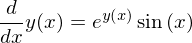

In [14]:
dgl = Eq(y(x).diff(x), exp(y(x))*sin(x))
dgl

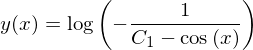

In [15]:
lsg = dsolve(dgl)
lsg

Wir lösen die Anfangswertaufgabe für das abstrakte $y_0$

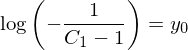

In [16]:
phi = lsg.rhs
ab = Eq(phi.subs(x,0), y0)
ab

In [17]:
lsg_ab = solve(ab, C1)
lsg_ab

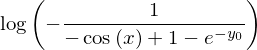

In [18]:
phi_ab = phi.subs(C1, lsg_ab[0])
phi_ab

Probe:

In [21]:
dgl.subs(y(x), phi_ab).doit().simplify()

In [22]:
phi_ab.subs(x,0) == y0

True

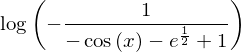

In [23]:
phi_12 = phi_ab.subs(y0, -Rational(1,2))
phi_12

In [24]:
plt.figure()
fn = lambdify(x, phi_12, 'numpy')
xn = np.linspace(-4, 10, 301)
wn = fn(xn)
wn[wn>2] = np.nan
plt.plot(xn, wn, linewidth=4); 

<string>:2: RuntimeWarning: invalid value encountered in log
C:\Users\braun\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [25]:
xq = np.linspace(-3.5, 9.5, 13)
yq = np.linspace(-.8, 1.95, 12)
X, Y = np.meshgrid(xq, yq)
vf = np.array([dgl.rhs.subs({x: xx, y(x): yy})
               for yy in yq for xx in xq]).reshape(12, 13).astype(float)
plt.quiver(X, Y, np.ones_like(X), vf, angles='xy');

Aber wo ist die Lösung definiert?

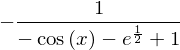

In [26]:
exp(phi_12)

In [27]:
tmp = 1/_
tmp

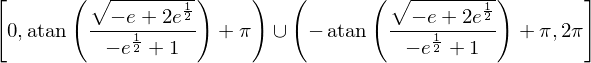

In [28]:
lsg = solveset(tmp>0, domain=Reals)
lsg

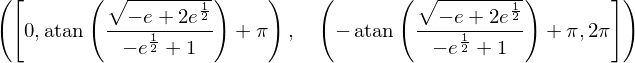

In [29]:
lsg.args

In [30]:
lsg.args[0].right.n()

In [31]:
(lsg.args[1].left-2*pi).n( )

Für welche $y0$ ist die Lösung auf ganz $\mathbb R$ definiert?

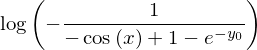

In [32]:
phi_ab

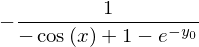

In [33]:
tmp =exp(phi_ab)
tmp

In [34]:
t1 = tmp.subs(x, 0)
solveset(Eq(1/t1, 0))

In [35]:
t2 = tmp.subs(x, pi)
lsg = solveset(Eq(1/t2, 0), domain=Reals)
lsg

In [37]:
l = list(lsg)[0]
fn1 = lambdify(x, phi_ab.subs(y0, 1.1*l), 'numpy')
fn2 = lambdify(x, phi_ab.subs(y0, l), 'numpy')
w2 = fn2(xn)
w2[w2>2] = np.nan
plt.plot(xn, fn1(xn), linewidth=4)
plt.plot(xn, w2, linewidth=4);

Höhere Ordnung

In [38]:
a = Symbol('a')

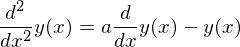

In [39]:
dgl = Eq(y(x).diff(x,2), a*y(x).diff(x) - y(x))
dgl

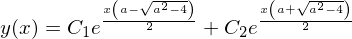

In [40]:
dsolve(dgl)

Gekoppelte Pendel

In [41]:
y = Function('y')
w = Function('w')
t = Symbol('t')

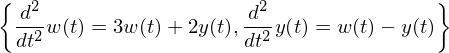

In [42]:
dgl1 = Eq(y(t).diff(t,2), w(t)-y(t))
dgl2 = Eq(w(t).diff(t,2), 2*y(t)+3*w(t))
dgs = {dgl1, dgl2}
dgs

Das ist nicht implementiert.  

Zugehöriges System erster Ordnung in Matrixschreibweise

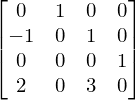

In [44]:
M = Matrix([[0,1,0,0], [-1, 0, 1, 0], [0,0,0,1], [2, 0, 3, 0]])
M

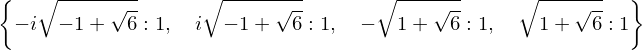

In [45]:
ew = M.eigenvals()
ew

In [ ]:
# M.exp()  # IndexError
# Folge von
# M.eigenvects()  # NotImplementedError

Ansatz

In [46]:
a = [Symbol(f'a_{j}') for j in range(4)]
b = [Symbol(f'b_{j}') for j in range(4)]

In [47]:
ya = sum([aa*exp(v*t) for aa, v in zip(a, ew)])
wb = sum([bb*exp(v*t) for bb, v in zip(b, ew)])
ya

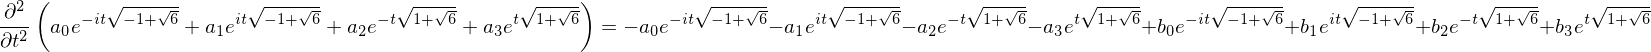

In [48]:
ers = { y(t): ya, w(t): wb}
dgl1.subs(ers)

In [49]:
tmp_glg = dgl1.subs(ers).doit().expand()
tmp = tmp_glg.lhs - tmp_glg.rhs
tmp

Koeffizientenvergleich

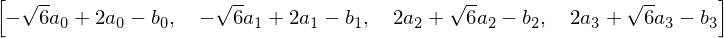

In [50]:
gls = []
for v in ew:
    gls.append(tmp.coeff(exp(v*t)))
gls

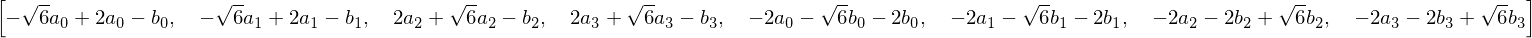

In [51]:
tmp_glg = dgl2.subs(ers).doit().expand()
tmp = tmp_glg.lhs - tmp_glg.rhs
for v in ew:
    gls.append(tmp.coeff(exp(v*t)))
gls

In [52]:
solve(gls)

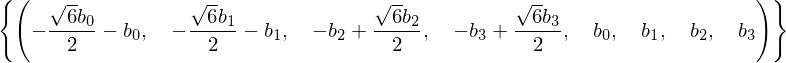

In [53]:
llsg = linsolve(gls, a+b)
llsg

Fundamentalsystem

In [54]:
l = list(llsg)[0]
ers = { a[0]: l[0], a[1]: l[1], a[2]:l[2], a[3]:l[3], b[0]:1, b[1]:0, b[2]:0, b[3]: 0}

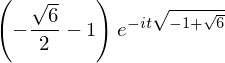

In [55]:
y1 = ya.subs(ers)
y1

In [56]:
w1 = wb.subs(ers)
w1

jetzt automatisch

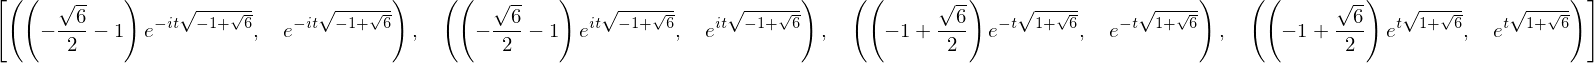

In [57]:
Phi = []
for j in range(4):
    ers = {a[i]: l[i] for i in range(4)}
    for i in range(4):
        ers[b[i]] = 0
    ers[b[j]] = 1
    yf = ya.subs(ers)
    wf = wb.subs(ers)
    Phi.append((yf, wf))
Phi

Löse die AWA $y(0)=0$, $y'(0)=0$, $w(0)=1$, $w'(0)=0 $

In [58]:
phi = sum([aa*p[0] for aa, p in zip(a, Phi)])
psi = sum([aa*p[1] for aa, p in zip(a, Phi)])

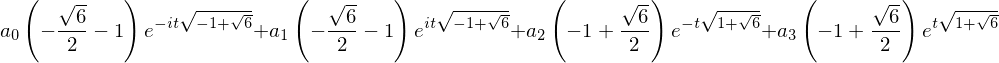

In [59]:
phi

In [60]:
psi

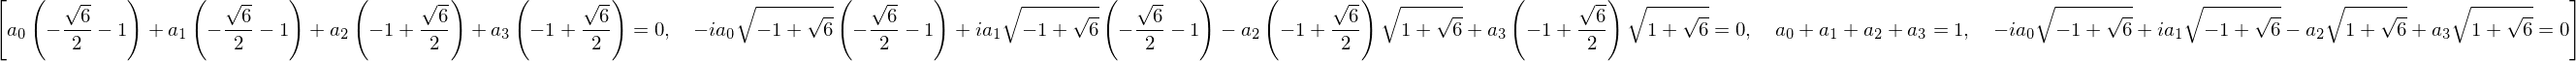

In [61]:
glg1 = Eq(phi.subs(t,0), 0)
glg2 = Eq(phi.diff(t).subs(t,0), 0)
glg3 = Eq(psi.subs(t,0), 1)
glg4 = Eq(psi.diff(t).subs(t,0), 0)
gls = [glg1, glg2, glg3, glg4]
gls

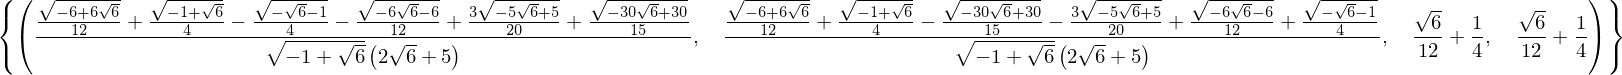

In [62]:
llsg = linsolve(gls, a)
llsg

Wir vereinfachen den ersten Ausdruck (Kür)

Es heißt nicht zufällig ComputerALGEBRA

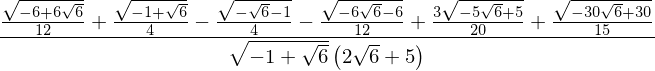

In [63]:
l = list(llsg)[0][0]
l

In [64]:
p = minimal_polynomial(l)
p

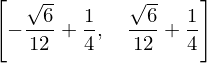

In [65]:
lp = solve(p)
lp

Probe

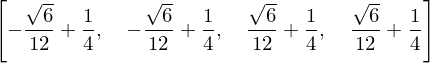

In [69]:
ls = list(llsg)[0]
l = [lp[0], lp[0], ls[2], ls[3]]
l

In [70]:
ers = {a[j]: l[j] for j in range(len(l))}
for glg in gls:
    display(glg.lhs.subs(ers).expand())